# Sentiment Analysis with NLP

This notebook demonstrates how to build a simple sentiment analysis model that can classify text as positive, negative, or neutral. We'll:

1. Generate synthetic training data
2. Preprocess the text data
3. Build and train a machine learning model
4. Evaluate the model
5. Test the model with custom input

## 1. Import Required Libraries

First, let's import the necessary libraries for our NLP task.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

## 2. Generate Training Data

Since we don't have an existing dataset, let's generate 100 example sentences with sentiment labels.

In [4]:
# Define example sentences for each sentiment category
positive_templates = [
    "I love {}",
    "This {} is amazing",
    "I'm really impressed with {}",
    "The {} was fantastic",
    "What a wonderful {}",
    "I'm so happy about {}",
    "This {} exceeded my expectations",
    "The {} is excellent",
    "I enjoyed {} very much",
    "Best {} I've ever experienced"
]

negative_templates = [
    "I hate {}",
    "This {} is terrible",
    "I'm very disappointed with {}",
    "The {} was awful",
    "What a horrible {}",
    "I'm so upset about {}",
    "This {} fell short of my expectations",
    "The {} is poor",
    "I disliked {} very much",
    "Worst {} I've ever experienced"
]

neutral_templates = [
    "This {} is okay",
    "The {} was average",
    "I have no strong feelings about {}",
    "The {} is neither good nor bad",
    "I'm indifferent about {}",
    "This {} meets basic expectations",
    "The {} is acceptable",
    "I don't have a strong opinion on {}",
    "The {} is somewhat ordinary",
    "This {} is standard"
]

In [5]:
# Define topics to fill in the templates
topics = [
    "movie", "restaurant", "product", "service", "experience", 
    "book", "hotel", "app", "concert", "weather", 
    "phone", "laptop", "vacation", "food", "game", 
    "course", "performance", "quality", "design", "meeting"
]

# Generate sentences
def generate_sentences(templates, topics, count):
    sentences = []
    for _ in range(count):
        template = random.choice(templates)
        topic = random.choice(topics)
        sentences.append(template.format(topic))
    return sentences

# Generate around 100 sentences total with balanced classes
positive_sentences = generate_sentences(positive_templates, topics, 34)
negative_sentences = generate_sentences(negative_templates, topics, 33)
neutral_sentences = generate_sentences(neutral_templates, topics, 33)

# Combine into a DataFrame
data = {
    'text': positive_sentences + negative_sentences + neutral_sentences,
    'sentiment': ['positive'] * len(positive_sentences) + 
                ['negative'] * len(negative_sentences) + 
                ['neutral'] * len(neutral_sentences)
}

# Create DataFrame and shuffle the data
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few examples
df.head()

,text,sentiment
0,The course was average,neutral
1,Worst vacation I've ever experienced,negative
2,The book is somewhat ordinary,neutral
3,The design was awful,negative
4,What a horrible product,negative


Let's see the distribution of sentiment labels in our dataset to ensure it's balanced:

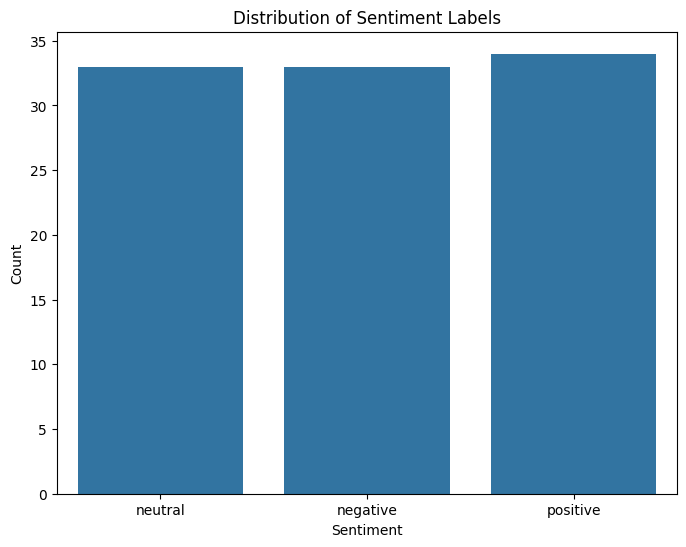

Total samples: 100
sentiment
positive    34
neutral     33
negative    33
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print(f"Total samples: {len(df)}")
print(df['sentiment'].value_counts())

## 3. Preprocess the Text Data

Let's convert the text into numerical features that can be used by machine learning algorithms.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=42
)

# Use TF-IDF vectorization to convert text to numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Training samples: {X_train_tfidf.shape[0]}")
print(f"Testing samples: {X_test_tfidf.shape[0]}")
# print(f"Number of features: {X_train_tfidf.shape[1]}")

Training samples: 80
Testing samples: 20
Number of features: 57


## 4. Build and Train the Model

We'll try two different models and compare their performance:
1. Multinomial Naive Bayes (often effective for text classification)
2. Logistic Regression (another common choice for text classification)

In [8]:
# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_predictions = nb_model.predict(X_test_tfidf)
lr_predictions = lr_model.predict(X_test_tfidf)

## 5. Evaluate the Models

Let's evaluate both models to see which performs better on our test data:



--- Naive Bayes Evaluation ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00         5
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



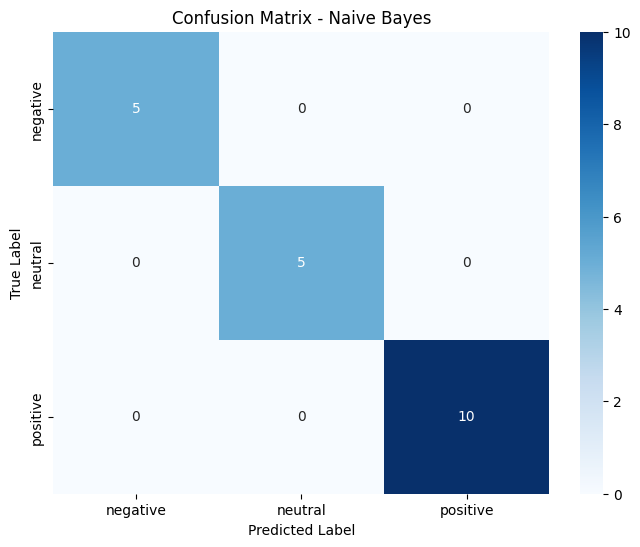


--- Logistic Regression Evaluation ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         5
     neutral       1.00      1.00      1.00         5
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



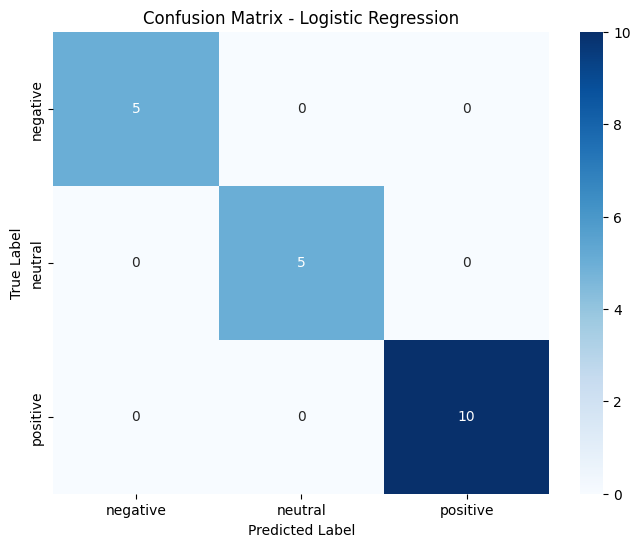


Logistic Regression model performs better and will be used for predictions.


In [9]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate both models
evaluate_model(y_test, nb_predictions, "Naive Bayes")
evaluate_model(y_test, lr_predictions, "Logistic Regression")

# Choose the better model based on accuracy
if accuracy_score(y_test, nb_predictions) > accuracy_score(y_test, lr_predictions):
    best_model = nb_model
    print("\nNaive Bayes model performs better and will be used for predictions.")
else:
    best_model = lr_model
    print("\nLogistic Regression model performs better and will be used for predictions.")

## 6. Test with Custom Input

Now let's create a function that can analyze the sentiment of any text input by a user:

In [10]:
def predict_sentiment(text, model=best_model):
    # Preprocess the input text using the same vectorizer
    text_tfidf = tfidf_vectorizer.transform([text])
    
    # Predict sentiment
    sentiment = model.predict(text_tfidf)[0]
    
    # Get probability scores for each class
    proba = model.predict_proba(text_tfidf)[0]
    confidence = max(proba) * 100
    
    return {
        'text': text,
        'sentiment': sentiment,
        'confidence': f"{confidence:.2f}%",
        'probabilities': {
            'negative': f"{proba[0]:.4f}",
            'neutral': f"{proba[1]:.4f}" if len(proba) > 2 else "N/A",
            'positive': f"{proba[-1]:.4f}"
        }
    }

### Interactive Testing

Let's test our model with some examples and then allow for user input:

In [11]:
# Test with some examples
examples = [
    "I absolutely loved the movie, it was fantastic!",
    "The service was terrible and the staff was rude.",
    "The restaurant was okay, nothing special.",
    "I'm not sure how I feel about this product yet."
]

for example in examples:
    result = predict_sentiment(example)
    print(f"Text: {result['text']}")
    print(f"Sentiment: {result['sentiment']} (Confidence: {result['confidence']})")
    print(f"Probabilities: {result['probabilities']}")
    print("-" * 80)

Text: I absolutely loved the movie, it was fantastic!
Sentiment: positive (Confidence: 62.38%)
Probabilities: {'negative': '0.1393', 'neutral': '0.2369', 'positive': '0.6238'}
--------------------------------------------------------------------------------
Text: The service was terrible and the staff was rude.
Sentiment: negative (Confidence: 51.70%)
Probabilities: {'negative': '0.5170', 'neutral': '0.2311', 'positive': '0.2520'}
--------------------------------------------------------------------------------
Text: The restaurant was okay, nothing special.
Sentiment: neutral (Confidence: 44.19%)
Probabilities: {'negative': '0.2891', 'neutral': '0.4419', 'positive': '0.2690'}
--------------------------------------------------------------------------------
Text: I'm not sure how I feel about this product yet.
Sentiment: negative (Confidence: 39.25%)
Probabilities: {'negative': '0.3925', 'neutral': '0.3465', 'positive': '0.2609'}
-----------------------------------------------------------

### User Input Interface

Now you can test the model with your own text input:

In [ ]:
# Function to analyze user input
def analyze_user_input():
    from IPython.display import display, clear_output
    import ipywidgets as widgets
    
    # Create input widget
    text_input = widgets.Textarea(
        value='',
        placeholder='Type your text here...',
        description='Text:',
        disabled=False,
        layout=widgets.Layout(width='80%', height='100px')
    )
    
    output = widgets.Output()
    
    # Create button
    button = widgets.Button(description="Analyze Sentiment")
    
    # Define button click function
    def on_button_click(b):
        with output:
            clear_output()
            if text_input.value.strip():
                result = predict_sentiment(text_input.value)
                print(f"Text: {result['text']}")
                print(f"Sentiment: {result['sentiment']} (Confidence: {result['confidence']})")
                print(f"Probabilities: {result['probabilities']}")
            else:
                print("Please enter some text to analyze.")
    
    button.on_click(on_button_click)
    
    # Display widgets
    display(text_input, button, output)

# Run the user input interface
analyze_user_input()

Textarea(value='', description='Text:', layout=Layout(height='100px', width='80%'), placeholder='Type your tex…

Button(description='Analyze Sentiment', style=ButtonStyle())

Output()

## 7. Save The Model (Optional)

If you want to save this model for future use, you can use joblib or pickle:

In [13]:
import joblib

# Save the model and vectorizer
joblib.dump(best_model, 'sentiment_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


## Conclusion

In this notebook, we've:

1. Generated a dataset of 100 sentences with sentiment labels
2. Preprocessed the text data by removing stopwords, punctuation, etc.
3. Built and compared two sentiment analysis models (Logistic Regression and Naive Bayes)
4. Evaluated the model's performance using metrics like accuracy and the confusion matrix
5. Created an interactive interface for testing the model with custom input

This provides a foundation for sentiment analysis that can be expanded with larger datasets, more advanced models, or integrated into applications.

## 8. Streamlit Interface

Let's create a Streamlit application for our sentiment analysis model. This will provide a web interface where users can enter text and get sentiment predictions.

In [ ]:
# Save this code to a file named 'sentiment_app.py'
%%writefile sentiment_app.py

import streamlit as st
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set page configuration
st.set_page_config(page_title="Sentiment Analysis App", layout="wide")

# Load the saved model and vectorizer
@st.cache_resource
def load_model():
    model = joblib.load('sentiment_model.joblib')
    vectorizer = joblib.load('tfidf_vectorizer.joblib')
    return model, vectorizer

# Function to predict sentiment
def predict_sentiment(text, model, vectorizer):
    # Preprocess the input text using the saved vectorizer
    text_tfidf = vectorizer.transform([text])
    
    # Predict sentiment
    sentiment = model.predict(text_tfidf)[0]
    
    # Get probability scores for each class
    proba = model.predict_proba(text_tfidf)[0]
    
    return sentiment, proba

# Create a function to get color for sentiment
def get_sentiment_color(sentiment):
    if sentiment == 'positive':
        return "#28a745"  # Green
    elif sentiment == 'negative':
        return "#dc3545"  # Red
    else:
        return "#6c757d"  # Gray for neutral

# Main function
def main():
    # App title
    st.title("Sentiment Analysis Tool")
    
    # Load model and vectorizer
    with st.spinner("Loading model..."):
        model, vectorizer = load_model()
    
    # App description
    st.write("""
    This application analyzes the sentiment of your text and classifies it as positive, negative, or neutral.
    Enter your text below and click 'Analyze' to get started!
    """)
    
    # Text input
    user_input = st.text_area("Enter text for sentiment analysis:", height=150)
    
    # Create columns for button alignment
    col1, col2, col3 = st.columns([1, 1, 5])
    
    # Submit button
    with col1:
        submit_button = st.button("Analyze")
    
    # Clear button
    with col2:
        clear_button = st.button("Clear")
    
    # Handle clear button
    if clear_button:
        st.session_state.user_input = ""
        st.rerun()
    
    # Examples
    with st.expander("Show example texts"):
        examples = [
            "I absolutely loved the movie, it was fantastic!",
            "The service was terrible and the staff was rude.",
            "The restaurant was okay, nothing special.",
            "I'm not sure how I feel about this product yet."
        ]
        
        for i, example in enumerate(examples):
            if st.button(f"Example {i+1}"):
                st.session_state.user_input = example
                st.rerun()
    
    # Keep track of input in session state
    if 'user_input' not in st.session_state:
        st.session_state.user_input = ""
    
    if user_input:
        st.session_state.user_input = user_input
    
    # When the button is clicked or input is submitted
    if submit_button and st.session_state.user_input:
        with st.spinner("Analyzing sentiment..."):
            # Get sentiment and probabilities
            sentiment, probabilities = predict_sentiment(st.session_state.user_input, model, vectorizer)
            
            # Display results
            st.markdown("### Analysis Result")
            
            # Create columns for layout
            col1, col2 = st.columns([1, 1])
            
            with col1:
                # Display sentiment with appropriate styling
                sentiment_color = get_sentiment_color(sentiment)
                st.markdown(f"<h2 style='color: {sentiment_color};'>{sentiment.upper()}</h2>", unsafe_allow_html=True)
                
                # Display confidence
                confidence = max(probabilities) * 100
                st.write(f"Confidence: {confidence:.2f}%")
            
            with col2:
                # Create bar chart for probabilities
                fig, ax = plt.subplots(figsize=(8, 2))
                
                # Define class names and colors
                class_names = model.classes_
                colors = ['#dc3545', '#6c757d', '#28a745'] if len(class_names) == 3 else ['#dc3545', '#28a745']
                
                # Plot horizontal bars
                bars = ax.barh(class_names, probabilities, color=colors)
                
                # Add percentage labels
                for i, bar in enumerate(bars):
                    width = bar.get_width()
                    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width*100:.1f}%", 
                            ha='left', va='center')
                
                # Set labels and title
                ax.set_xlabel('Probability')
                ax.set_title('Sentiment Probability Distribution')
                ax.set_xlim(0, 1)
                
                # Remove top and right spines
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                
                # Show the plot
                st.pyplot(fig)
            
            # Show analyzed text
            st.markdown("### Text Analyzed")
            st.write(st.session_state.user_input)
            
    # Show a warning if no text is entered
    elif submit_button:
        st.warning("Please enter some text to analyze.")

# Run the app
if __name__ == "__main__":
    main()

### Run Streamlit App

To run the Streamlit app, execute the following command in your terminal:

```bash
streamlit run sentiment_app.py
```

This will open a web browser with your sentiment analysis app running. If Streamlit is not installed, you can install it with:

```bash
pip install streamlit
```

In [ ]:
# Install streamlit if needed
#!pip install streamlit